In [3]:
# Step 2: Import Required Libraries
import torch  # Core PyTorch library for tensor operations and model inference
from torchvision.models.detection import fasterrcnn_resnet50_fpn  # Pre-trained Faster R-CNN model
from torchvision.transforms import functional as F  # Image transformation utilities
from torchvision.utils import draw_bounding_boxes  # For drawing bounding boxes
from torchvision.transforms import ToPILImage  # Convert tensor to PIL image
import matplotlib.pyplot as plt  # Visualization library
from PIL import Image  # Image processing library
import cv2  # OpenCV for image handling
import numpy as np  # Numerical computations

In [4]:
# Step 3: Load Pre-Trained Model
# Faster R-CNN pre-trained on COCO dataset is loaded
# The model is set to evaluation mode to avoid training-related computations
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set model to evaluation mode

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 144MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [9]:
# Step 4: Upload and Test an Image
# Google Colab provides a file upload feature to easily upload images
from google.colab import files  # Colab-specific file upload library
uploaded = files.upload()  # Upload an image file
image_path = list(uploaded.keys())[0]  # Get the uploaded file name
image = Image.open(image_path).convert("RGB")  # Open and convert image to RGB

# Convert image to PyTorch tensor
image_tensor = F.to_tensor(image)  # Transform image to tensor

Saving test img.webp to test img.webp


In [10]:
# Step 5: Perform Object Detection
# Perform inference using the pre-trained model
with torch.no_grad():  # Disable gradient computation for inference
    predictions = model([image_tensor])

# Extract bounding boxes, labels, and scores from the model's output
boxes = predictions[0]['boxes']  # Bounding box coordinates
labels = predictions[0]['labels']  # Detected class labels
scores = predictions[0]['scores']  # Confidence scores

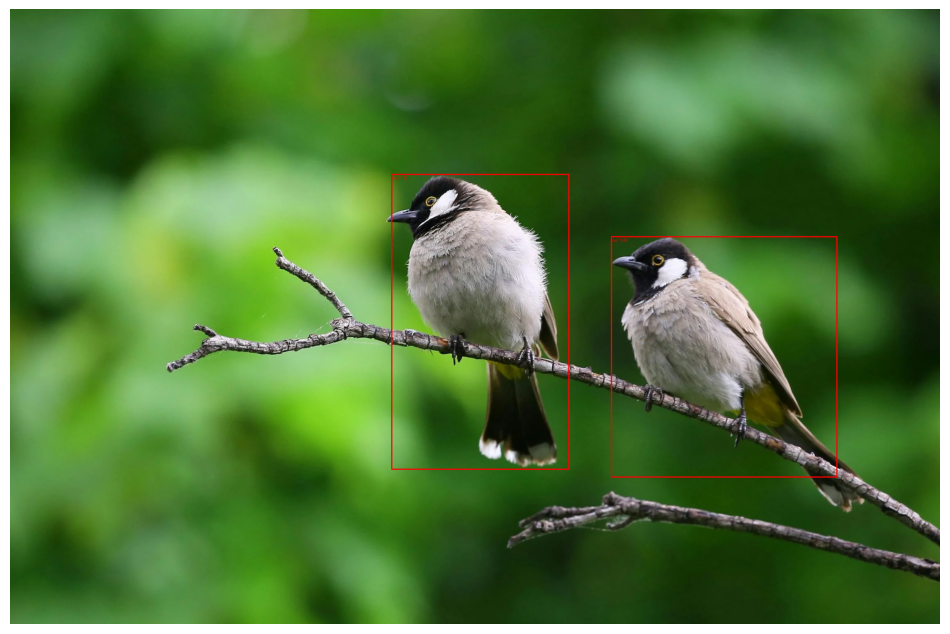

In [15]:
# Step 6: Visualize the Results with Object Names
# COCO Dataset Class Labels
COCO_CLASSES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck',
    'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat',
    'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
    'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork',
    'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog',
    'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'TV',
    'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink',
    'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush',
    'scarf', 'gloves', 'boots', 'umbrella', 'wallet', 'hat', 'sunglasses', 'ring', 'necklace', 'bracelet',
    'luggage', 'broom', 'vacuum cleaner', 'lawn mower', 'wheelbarrow', 'shovel', 'hammer', 'screwdriver',
    'wrench', 'pliers', 'saw', 'drill', 'drill press', 'chainsaw', 'pickaxe', 'shovel', 'crowbar', 'mop',
    'paper', 'tissue', 'towel', 'toothpaste', 'shampoo', 'soap', 'lipstick', 'makeup', 'nail polish',
    'perfume', 'camera', 'projector', 'printer', 'photocopier', 'fax machine', 'telephone', 'radio',
    'satellite dish', 'microscope', 'telescope', 'fishing rod', 'clothes hanger', 'fan', 'air conditioner',
    'heating system', 'fireplace', 'water cooler', 'thermometer', 'oven mitt', 'grill', 'barbecue',
    'blender', 'coffee maker', 'kettle', 'toaster oven', 'stove', 'dishwasher', 'washing machine',
    'dryer', 'iron', 'fan', 'hair straightener', 'clothes iron', 'refrigerator', 'bottle opener',
    'can opener', 'tape measure', 'calculator', 'glasses', 'cup holder', 'tray', 'bed frame', 'mirror',
    'chandelier', 'window', 'floor lamp', 'ceiling fan', 'pillow', 'blanket', 'quilt', 'comforter',
    'curtain', 'drapes', 'carpet', 'rug', 'wall clock', 'desk', 'table lamp', 'computer monitor'
]


# Filter detections with confidence scores above a threshold
threshold = 0.5
keep = scores > threshold

# Get filtered labels and map them to class names
filtered_labels = labels[keep]
filtered_boxes = boxes[keep]
filtered_scores = scores[keep]

# Map label indices to object names
object_names = [COCO_CLASSES[label.item()] for label in filtered_labels]

# Draw bounding boxes with labels and scores on the image
image_with_boxes = draw_bounding_boxes(
    (image_tensor * 255).byte(),  # Convert tensor to byte scale
    filtered_boxes,  # Bounding boxes
    colors="red",  # Box color
    labels=[f"{name}: {score:.2f}" for name, score in zip(object_names, filtered_scores)],  # Name and confidence
    width=3  # Line width
)

# Convert tensor back to PIL image for display
plt.figure(figsize=(12, 8))
plt.imshow(ToPILImage()(image_with_boxes))
plt.axis("off")
plt.show()


In [14]:
# Step 7: Save the Results
# Save the processed image to the Colab environment
output_path = "detected_image.jpg"  # Output file name
image_with_boxes_pil = ToPILImage()(image_with_boxes)  # Convert to PIL image
image_with_boxes_pil.save(output_path)  # Save image locally
print(f"Detected image saved at {output_path}")  # Confirm save location

# Allow user to download the result
files.download(output_path)  # Download image to local system

Detected image saved at detected_image.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>